# Height - Weight Prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Height Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.head(7)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889


In [5]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [7]:
df.shape

(3501, 2)

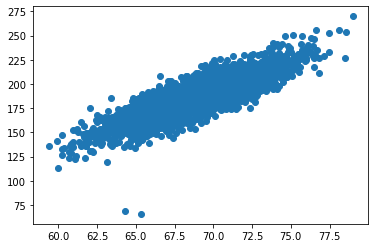

In [8]:
plt.scatter(df['Height'],df['Weight'])

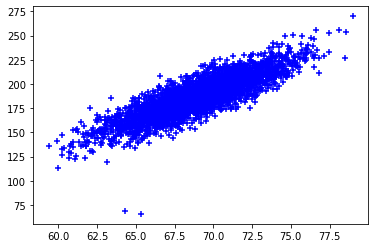

In [9]:
plt.scatter(df['Height'],df['Weight'], color='blue', marker='+')

Text(0.5, 1.0, 'Height and Weight')

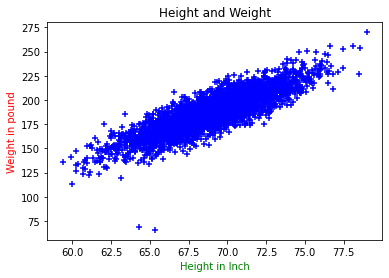

In [10]:
plt.scatter(df['Height'],df['Weight'], color='blue', marker='+')
plt.xlabel('Height in Inch', color='green')
plt.ylabel('Weight in pound', color='red')
plt.title('Height and Weight', color='black')

In [11]:
df.Height.mean()

69.02441087268797

In [12]:
df.Weight.mean()

186.89125797946284

# Seperate dependent and independend variable

In [13]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [14]:
x=df[['Height']] # x = df.drop('rent', axis=1)
y=df['Weight']

In [15]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [16]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# split the dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#train=70%
#test=30%
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=.30, random_state=1) #Train_size=.70

In [19]:
xtrain.head()

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [20]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [21]:
xtrain.shape

(2450, 1)

In [22]:
xtest.shape

(1051, 1)

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable

In [24]:
reg=LinearRegression()

In [25]:
reg.fit(xtrain, ytrain) #traing model

LinearRegression()

In [26]:
reg.predict([[73.847017]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215.59078201])

In [27]:
xtrain.head(2)

,Height
221,66.786927
2696,65.192862


In [28]:
ytrain.head(2)

221     165.431242
2696    185.348211
Name: Weight, dtype: float64

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
reg.predict([[73.847017]])

array([215.59078201])

In [31]:
ytest.head() #absolute y data

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
Name: Weight, dtype: float64

In [32]:
ypred=reg.predict(xtest) #prediction y data

In [33]:
ypred

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mse=mean_squared_error(ytest, ypred)

In [36]:
mse

110.89221516932383

In [37]:
m=reg.coef_

In [38]:
m

array([5.97744946])

In [39]:
c=reg.intercept_

In [40]:
c

-225.82603000755827

In [41]:
#y=(m*x) +c
result=m*73.847017 +c    #manual prediction
result

array([215.59078201])

In [42]:
reg.predict([[73.847017]])

array([215.59078201])

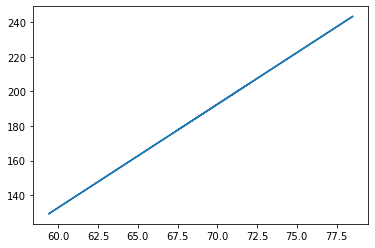

In [55]:
plt.plot(np.squeeze(xtest),reg.predict(xtest))

In [56]:
#best Fit Line
#plt.plot(xtest,reg.predict(xtest))
pred=reg.predict(xtest)

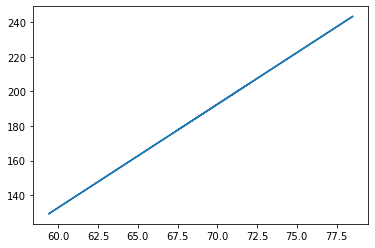

In [54]:
plt.plot(np.squeeze(xtest),pred) #if pc version problem

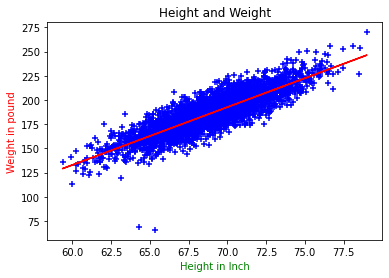

In [60]:
plt.scatter(df['Height'],df['Weight'], color='blue', marker='+')
plt.xlabel('Height in Inch', color='green')
plt.ylabel('Weight in pound', color='red')
plt.title('Height and Weight', color='black')
plt.plot(np.squeeze(df.Height),reg.predict(df[['Height']]), color='red') # for 2d df[['Height']]

In [62]:
xtrain.to_csv('newdata.csv')

In [63]:
newdata=pd.read_csv('newdata.csv')

In [64]:
newdata.head()

,Unnamed: 0,Height
0,221,66.786927
1,2696,65.192862
2,1334,68.390109
3,3402,68.145621
4,1159,71.647580


In [65]:
newdata.drop('Unnamed: 0', axis=1, inplace=True)

In [66]:
newdata.head()

,Height
0,66.786927
1,65.192862
2,68.390109
3,68.145621
4,71.647580


In [67]:
reg.predict(newdata)

array([173.38945227, 163.86100911, 182.97238866, ..., 228.45987235,
       195.91437382, 194.20551648])

In [68]:
reg.score(xtest, ytest) #testing accuracy

0.7313258168853621

In [69]:
reg.score(xtrain, ytrain) #training accuracy

0.7327243206606743

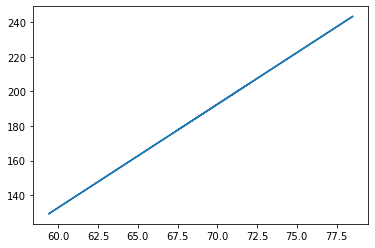

In [71]:
pred=reg.predict(xtest)
plt.plot(np.squeeze(xtest), pred)